In [13]:
import matplotlib.pyplot as plt
import numpy as np


In [14]:
n_obs_steps = [2, 8, 12, 14, 16, 24, 32]
transformer_runtime = [1163, 1319, 1555, 1700, 2180, 3612, 3869]
unet_runtime = [9233, 10576, 11108, 11527, 13023, 13188, 14566]

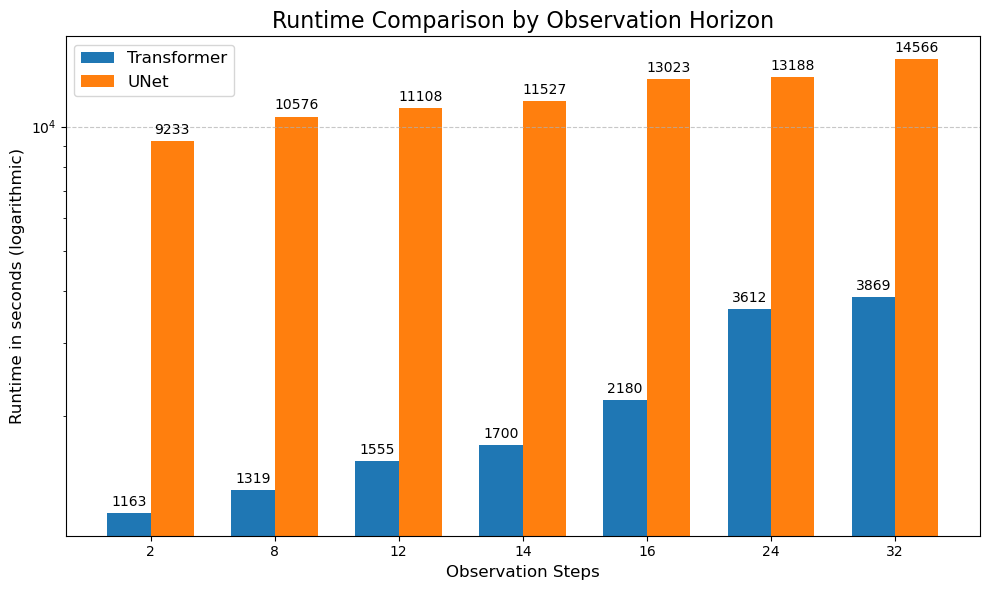

In [15]:
bar_width = 0.35
x = np.arange(len(n_obs_steps))

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - bar_width/2, transformer_runtime, bar_width, label='Transformer')
bars2 = ax.bar(x + bar_width/2, unet_runtime, bar_width, label='UNet')

ax.set_xlabel('Observation Steps', fontsize=12)
ax.set_ylabel('Runtime in seconds (logarithmic)', fontsize=12)
ax.set_title('Runtime Comparison by Observation Horizon', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(n_obs_steps, fontsize=10)
ax.set_yscale('log') 
ax.legend(fontsize=12, loc='upper left')

ax.grid(axis='y', linestyle='--', alpha=0.7)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height)}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig("images/bar_chart_runtime_comparison.png", dpi=300)
plt.show()